<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/01.5-Barrier_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit[visualization]
!pip install imgaug==0.2.5
!pip install pylatexenc

In [2]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf

[default]
circuit_drawer = mpl


References:


* https://www.youtube.com/watch?v=tS2CMOyWFMQ
* https://www.youtube.com/watch?v=CdoCPz6TC9k
* https://qiskit.org/documentation/stubs/qiskit.circuit.library.Barrier.html




## Barrier Operation
Barrier is a instruction for the transpiler. It says to the transpiler to stop optimizing gates. Optimizations between barriers are still optimized

### Transpilation affecting original circuit

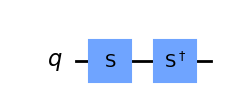

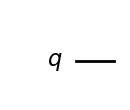

In [ ]:
#Example where barrier is not used. Transpilation optimizes the circuit, removing the 2 unecessary operations
from qiskit import QuantumCircuit, transpile, Aer

qc = QuantumCircuit(1)
qc.s(0)
qc.sdg(0)

display(qc.draw())

be = Aer.get_backend("qasm_simulator")
qc_trans = transpile(qc, be)
display(qc_trans.draw())

### Using barrier() to avoid optimization

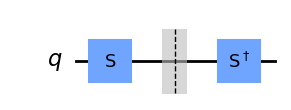

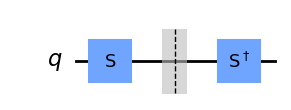

In [ ]:
#Example where barrier is used. Note transpilation does NOT remove the gates, even when they are unecessary
from qiskit import QuantumCircuit, transpile, Aer

qc = QuantumCircuit(1)
qc.s(0)
qc.barrier()
qc.sdg(0)

display(qc.draw())

be = Aer.get_backend("qasm_simulator")
qc_trans = transpile(qc, be)
display(qc_trans.draw())

### Choosing qubits affected by the qc.barrier() instruction

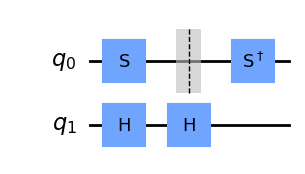

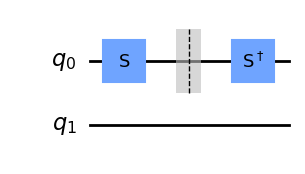

In [ ]:
#One can choose which qubits are affected by the barrier, like in the example below... Note the Hadamard gates were removed, as their qubit is not part of the barrier
from qiskit import QuantumCircuit, transpile, Aer

qc = QuantumCircuit(2)
qc.s(0)
qc.h(1)
qc.barrier(0)
qc.sdg(0)

qc.h(1)

display(qc.draw())

be = Aer.get_backend("qasm_simulator")
qc_trans = transpile(qc, be)
display(qc_trans.draw())

### Barrier with array of qubits or with one qubit per parameter
qc.barrier([qb1, qb2..., qbn]) or qc.barrier(qb1, qb2,..., qbn)

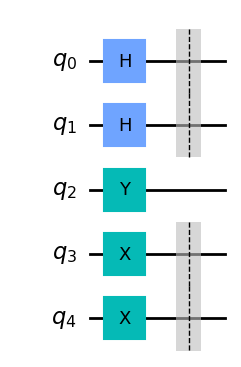

In [7]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(5)
qc.h([0,1])
qc.barrier(0,1)
qc.y(2)
qc.x([3,4])
qc.barrier([3,4])
display(qc.draw("mpl"))

In [8]:
import qiskit.tools.jupyter
%qiskit_version_table